In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 9)
pd.set_option('display.max_columns', 100)

In [8]:
df = pd.read_csv('Advertising.csv')

In [9]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
X = df.drop('sales', axis=1)
y = df['sales']

In [189]:
from sklearn.preprocessing import PolynomialFeatures

In [190]:
polynomial = PolynomialFeatures(degree=5, include_bias=False)
poly_features = polynomial.fit_transform(X)

In [191]:
poly_features.shape

(200, 55)

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

In [194]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [195]:
scaler = StandardScaler()

In [196]:
scaler.fit(X_train)

StandardScaler()

In [197]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [198]:
X_train_scaled = scaler.transform(X_train)

In [199]:
X_train_scaled

array([[-0.40424839, -1.02823707, -0.33767538, ..., -0.44017978,
        -0.35817255, -0.28930697],
       [ 0.32060772, -0.91982774, -1.16143931, ..., -0.44391152,
        -0.36370582, -0.29622876],
       [-1.27051084,  0.2591237 ,  0.25425079, ..., -0.28157937,
        -0.26073421, -0.24008316],
       ...,
       [ 0.80424121,  0.71986334,  1.43317042, ...,  0.7705482 ,
         0.6680601 ,  0.45733704],
       [ 0.1851428 , -0.87239866, -0.60897488, ..., -0.44115811,
        -0.36130657, -0.29446003],
       [ 1.54692165, -0.86562307, -0.42153159, ..., -0.43876277,
        -0.35836127, -0.29150925]])

In [205]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.15781217,  0.59112727,  1.13227461, ...,  0.33494015,
         0.26526052,  0.14042253],
       [ 0.53925283,  1.68199613,  1.13227461, ...,  1.33091017,
         0.5857351 ,  0.14042253],
       [ 1.69783431,  0.36753303,  0.65380096, ..., -0.10377617,
        -0.11321161, -0.13764621],
       ...,
       [ 1.46968288,  0.40818653,  1.46769945, ...,  0.49244978,
         0.5693803 ,  0.50311419],
       [-0.38998892, -0.55394626, -1.21076649, ..., -0.44385169,
        -0.36371371, -0.29623523],
       [-1.45588388, -1.44154763, -0.45606062, ..., -0.44391134,
        -0.36299878, -0.292234  ]])

In [206]:
pd.DataFrame(X_train_scaled).agg(['mean', 'std']).round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000
std,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003


In [207]:
pd.DataFrame(X_test_scaled).agg(['mean', 'std']).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0


In [208]:
from sklearn.linear_model import LinearRegression

In [209]:
model = LinearRegression()

In [210]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [211]:
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

In [212]:
y_pred

array([ 16.92366435,  22.55954937,  20.83443331,   6.95403777,
        22.93202724,  12.73504115,  22.9249331 ,   8.93269346,
        11.7653192 ,  15.38849068,   8.5034252 ,   8.76085688,
        20.44072315,   4.35377822,  10.27893189,  12.18939816,
         6.05301968,  16.35221365,  11.11167325,  18.83004377,
        20.20255496, -41.80822012,  10.95450243,  22.44357061,
         9.92421296,   8.26680626,  22.43639174,  12.48305198,
        10.57423278,   4.12842605,  11.16951191,  10.9485874 ,
        22.80861084,   3.78859223,  16.02968184,  20.94389483,
        12.31044486,  21.03213838,  11.92119657,   6.76966736])

In [213]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [214]:
def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    scores = {model_name+'_train': {'R2': r2_score(y_train, y_train_pred),
              'mae': mean_absolute_error(y_train, y_train_pred),
                'mse': mean_squared_error(y_train, y_train_pred),
                'rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)) },
                                    
                 model_name+'_test': {'R2': r2_score(y_test, y_pred),
                 'mae': mean_absolute_error(y_test, y_pred),
                  'mse': mean_squared_error(y_test, y_pred),
                  'rmse': np.sqrt(mean_squared_error(y_test, y_pred))                    
                                     }}
    return pd.DataFrame(scores)

In [215]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, 'linear')
ls

,linear_train,linear_test
R2,0.997581,-1.423718
mae,0.187958,2.107643
mse,0.062748,76.501251
rmse,0.250495,8.746499


In [216]:
def color_red(val):
    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else: 
        color = 'blue'
    return f'color: {color}'
pd.DataFrame(poly_features).corr().style.applymap(color_red)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.054809,0.056648,0.967662,0.662160,0.603099,0.050844,0.046222,0.055626,0.912265,0.721105,0.650492,0.515275,0.466823,0.420083,0.048734,0.039665,0.028958,0.039409,0.855073,0.709761,0.630912,0.584542,0.516807,0.460056,0.437080,0.409771,0.364701,0.315533,0.046959,0.032900,0.017709,0.008777,0.020708,0.801581,0.680833,0.596879,0.588127,0.506564,0.447078,0.505741,0.462847,0.403394,0.346404,0.384146,0.373602,0.343453,0.286909,0.243084,0.045768,0.026080,0.007613,-0.004329,-0.007060,0.004975
1,0.054809,1.000000,0.354104,0.078644,0.681392,0.250204,0.966752,0.708347,0.352336,0.085030,0.548158,0.217652,0.738807,0.549689,0.259887,0.912163,0.738767,0.538912,0.296300,0.084899,0.473991,0.201889,0.615548,0.449913,0.218735,0.725701,0.596713,0.435679,0.221477,0.858447,0.728288,0.578239,0.405678,0.233682,0.082679,0.420642,0.191371,0.539663,0.389348,0.198233,0.616497,0.492912,0.353459,0.181827,0.697530,0.604193,0.480872,0.335472,0.178656,0.809579,0.705871,0.590660,0.441864,0.300963,0.183753
2,0.056648,0.354104,1.000000,0.076442,0.251706,0.710860,0.361405,0.846215,0.939677,0.087403,0.223935,0.586885,0.277229,0.649722,0.744348,0.348591,0.756600,0.848977,0.820403,0.093523,0.216804,0.523625,0.251371,0.545914,0.618126,0.270379,0.595505,0.681096,0.683016,0.329318,0.689047,0.792878,0.765061,0.697417,0.097150,0.214929,0.480870,0.244256,0.490294,0.547514,0.247790,0.509593,0.561287,0.560250,0.253301,0.548691,0.643265,0.634693,0.606379,0.308883,0.629623,0.744772,0.740034,0.661761,0.595177
3,0.967662,0.078644,0.076442,1.000000,0.655610,0.604786,0.074717,0.077064,0.085473,0.984478,0.754241,0.688295,0.515837,0.483686,0.441567,0.069934,0.072344,0.066860,0.071437,0.952132,0.772650,0.694074,0.615256,0.560653,0.504148,0.439513,0.430431,0.395637,0.346060,0.064975,0.064502,0.058043,0.047638,0.050892,0.914302,0.763650,0.675974,0.643078,0.569615,0.506698,0.533678,0.507202,0.453477,0.391984,0.386548,0.394148,0.376481,0.324503,0.277483,0.060771,0.055516,0.048174,0.037872,0.028539,0.031722
4,0.662160,0.681392,0.251706,0.655610,1.000000,0.593723,0.664399,0.485959,0.241570,0.627090,0.965952,0.613323,0.962962,0.777374,0.490596,0.631071,0.502268,0.356248,0.190696,0.594024,0.910381,0.596252,0.951173,0.762204,0.504128,0.905034,0.783817,0.618268,0.392485,0.597633,0.490224,0.372765,0.250397,0.138198,0.561829,0.853111,0.571575,0.906957,0.717061,0.487728,0.905252,0.771478,0.605065,0.401054,0.848834,0.767547,0.645128,0.482578,0.309573,0.567146,0.470411,0.371193,0.262030,0.169913,0.097704
5,0.603099,0.250204,0.710860,0.604786,0.593723,1.000000,0.253924,0.576143,0.663457,0.587286,0.627367,0.969091,0.538715,0.867956,0.937710,0.241838,0.504354,0.558658,0.564313,0.564874,0.627426,0.921108,0.583577,0.860898,0.909793,0.489275,0.786042,0.847498,0.826914,0.224767,0.448703,0.503393,0.481855,0.460299,0.542113,0.617954,0.873051,0.594081,0.826298,0.859458,0.536670,0.794702,0.826686,0.797872,0.443163,0.720646,0.800253,0.764051,0.714386,0.207342,0.399518,0.456294,0.445350,0.396279,0.372849
6,0.050844,0.966752,0.361405,0.074717,0.664399,0.253924,1.000000,0.717856,0.356512,0.081937,0.536793,0.221874,0.768358,0.554347,0.259786,0.985102,0.783297,0.552534,0.297371,0.082618,0.465376,0.206476,0.640765,0.454135,0.219410,0.787473,0.628876,0.439364,0.217841,0.955280,0.798072,0.614792,0.414209,0.232155,0.080961,0.413689,0.196065,0.561681,0.393295,0.199027,0.668950,0.518426,0.355656,0.179322,0.779714,0.658326,0.503108,0.333459,0.172715,0.921100,0.792812,0.646188,0.465716,0.303686,0.180208
7,0.046222,0.708347,0.846215,0.077064,0.485959,0.576143,0.717856,1.000000,0.834543,0.095289,0.411600,0.485136,0.543085,0.756910,0.620568,0.695496,0.977682,0.941437,0.743549,0.107359,0.378923,0.445148,0.471052,0.633268,0.518778,0.539793,0.763229,0.738939,0.573946,0.664420,0.935782,0.944307,0.819946,0.636391,0.116108,0.358969,0.420758,0.435308,0.565920,0.469426,0

In [217]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [218]:
df_vif = df.copy()
df_predictors = df.drop('sales', axis=1)
predictors = df_predictors.columns

In [219]:
vif_data = pd.DataFrame()
vif_data['Variable'] = predictors

In [220]:
vif_data['VIF'] = [variance_inflation_factor(df[predictors].values, i) for i in range(len(predictors))]

In [221]:
vif_data

,Variable,VIF
0,TV,2.486772
1,radio,3.285462
2,newspaper,3.055245


In [222]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [223]:
from sklearn.metrics import SCORERS
SCORERS.keys()

ImportError: cannot import name 'SCORERS' from 'sklearn.metrics' (C:\Users\habob\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score

In [224]:
ml = LinearRegression()

In [225]:
scores = cross_validate(ml, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error'], cv = 10, return_train_score=True)

In [226]:
scores

{'fit_time': array([0.00666475, 0.00551391, 0.        , 0.00230384, 0.        ,
        0.00243378, 0.        , 0.0034976 , 0.0050137 , 0.        ]),
 'score_time': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00256515, 0.        , 0.00146532, 0.00486135]),
 'test_r2': array([ 0.94345854,  0.98360242,  0.97961969, -5.69207862,  0.99353704,
         0.99682955,  0.9907342 ,  0.99244878,  0.97990659,  0.99041525]),
 'train_r2': array([0.99772768, 0.99798944, 0.99774108, 0.99785192, 0.99779843,
        0.99751821, 0.99776809, 0.99746136, 0.9977302 , 0.99781087]),
 'test_neg_mean_absolute_error': array([-0.38633232, -0.45398645, -0.43863405, -3.57023678, -0.30378975,
        -0.27952145, -0.33635204, -0.4075215 , -0.44307322, -0.26112228]),
 'train_neg_mean_absolute_error': array([-0.18751993, -0.16968183, -0.18401554, -0.1794792 , -0.17537787,
        -0.18448179, -0.17882463, -0.18987238, -0.18213515, -0.18638233]),
 'test_neg_mean_squared_erro

In [227]:
pd.DataFrame(scores, index= range(1,11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.006665,0.000000,0.943459,0.997728,-0.386332,-0.187520,-0.283944,-0.060925,-0.532864,-0.246830
2,0.005514,0.000000,0.983602,0.997989,-0.453986,-0.169682,-0.390895,-0.051659,-0.625216,-0.227286
3,0.000000,0.000000,0.979620,0.997741,-0.438634,-0.184016,-0.364728,-0.060050,-0.603927,-0.245050
4,0.002304,0.000000,-5.692079,0.997852,-3.570237,-0.179479,-166.686869,-0.055581,-12.910727,-0.235755
5,0.000000,0.000000,0.993537,0.997798,-0.303790,-0.175378,-0.153806,-0.056749,-0.392181,-0.238220
6,0.002434,0.000000,0.996830,0.997518,-0.279521,-0.184482,-0.104168,-0.062363,-0.322751,-0.249726
7,0.000000,0.002565,0.990734,0.997768,-0.336352,-0.178825,-0.200500,-0.058872,-0.447772,-0.242635
8,0.003498,0.000000,0.992449,0.997461,-0.407521,-0.189872,-0.308899,-0.061348,-0.555787,-0.247685
9,0.005014,0.001465,0.979907,0.997730,-0.443073,-0.182135,-0.610626,-0.057327,-0.781426,-0.239430
10,0.000000,0.004861,0.990415,0.997811,-0.261122,-0.186382,-0.123434,-0.059946,-0.351331,-0.244838


In [228]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:, 2:].mean()

test_r2                               0.315847
train_r2                              0.997740
test_neg_mean_absolute_error         -0.688057
train_neg_mean_absolute_error        -0.181777
test_neg_mean_squared_error         -16.922787
train_neg_mean_squared_error         -0.058482
test_neg_root_mean_squared_error     -1.752398
train_neg_root_mean_squared_error    -0.241746
dtype: float64

In [229]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.997581,-1.423718
mae,0.187958,2.107643
mse,0.062748,76.501251
rmse,0.250495,8.746499


In [230]:
model.coef_

array([ 16.59727508,  -5.40405972,  -1.74928347, -62.33833778,
        16.90858661, -17.0396797 ,  18.33163138,  17.36342203,
        13.11462122, 111.07662344, -22.81391604,  44.26971429,
       -14.94945789, -26.02529709,  32.27766406, -29.6922559 ,
       -17.88079357, -30.82621205, -35.40557097, -93.69458809,
        27.30198689, -49.13969978, -10.86611732,  44.48527329,
       -55.26045722,  24.00912753,   1.98877056,  14.83064039,
       -16.4443257 ,  24.55166492,   2.88839217,  27.34790657,
        21.76432967,  42.14254255,  29.91636033, -12.96100179,
        20.98438147,  12.13988278, -26.82413453,  26.51197649,
        -7.92317222,   4.38181124,  -7.34055459,  14.14705248,
        -4.83551241,  -4.8904204 ,   2.54950883, -11.77617458,
         7.74633833, -10.15349317,   8.1863474 , -17.73958393,
         1.13383523,  -8.53196007, -20.74476395])

In [231]:
model_coef = pd.DataFrame(model.coef_, columns = ['coef'])

Ridge Regression

In [232]:
from sklearn.linear_model import Ridge

In [233]:
ridge_model = Ridge(alpha=1)

In [234]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [235]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [236]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, 'linear')
rs

,linear_train,linear_test
R2,0.987205,0.984232
mae,0.364623,0.557799
mse,0.331859,0.497710
rmse,0.576072,0.705486


In [237]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,linear_train,linear_test
R2,0.997581,-1.423718,0.987205,0.984232
mae,0.187958,2.107643,0.364623,0.557799
mse,0.062748,76.501251,0.331859,0.497710
rmse,0.250495,8.746499,0.576072,0.705486


In [238]:
model = Ridge(alpha=1)

In [239]:
from sklearn.model_selection import cross_validate
# from sklearn import linear_model
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import train_test_split

In [240]:
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)

In [241]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.002656,0.001017,0.909424,0.987075,-0.554577,-0.357851,-0.454859,-0.346534,-0.674433,-0.588671
2,0.002350,0.001004,0.988384,0.986841,-0.407609,-0.368516,-0.276898,-0.338107,-0.526211,-0.581470
3,0.000000,0.001668,0.985714,0.987132,-0.415267,-0.365436,-0.255661,-0.342068,-0.505629,-0.584866
4,0.001536,0.000000,0.920100,0.987767,-0.763229,-0.358082,-1.990155,-0.316532,-1.410728,-0.562611
5,0.000000,0.000000,0.995553,0.986184,-0.257907,-0.376688,-0.105827,-0.356141,-0.325311,-0.596775
6,0.000000,0.000000,0.977663,0.987187,-0.388813,-0.365154,-0.733912,-0.321978,-0.856687,-0.567431
7,0.000000,0.000000,0.992759,0.986392,-0.365033,-0.376714,-0.156693,-0.358936,-0.395845,-0.599113
8,0.002244,0.000000,0.993167,0.985360,-0.439520,-0.365369,-0.279522,-0.353782,-0.528698,-0.594796
9,0.000000,0.002547,0.915947,0.991464,-0.754910,-0.329176,-2.554330,-0.215583,-1.598227,-0.464309
10,0.001503,0.001767,0.985719,0.987017,-0.338109,-0.371542,-0.183907,-0.355516,-0.428843,-0.596251


In [242]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:, 2:].mean()

test_r2                              0.966443
train_r2                             0.987242
test_neg_mean_absolute_error        -0.468497
train_neg_mean_absolute_error       -0.363453
test_neg_mean_squared_error         -0.699176
train_neg_mean_squared_error        -0.330518
test_neg_root_mean_squared_error    -0.725061
train_neg_root_mean_squared_error   -0.573629
dtype: float64

In [243]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.987205,0.984232
mae,0.364623,0.557799
mse,0.331859,0.497710
rmse,0.576072,0.705486


In [244]:
ridge_model.coef_

array([ 3.71450604e+00,  6.75147866e-01,  2.45026233e-01, -1.03692214e+00,
        2.49619996e+00,  2.50747065e-01, -3.80972752e-02,  1.63781753e-01,
       -1.92793081e-01, -1.06022676e+00, -6.67857903e-02, -8.12695795e-01,
        1.25026950e+00,  4.88024688e-02,  1.10978317e-01, -3.07452443e-01,
        9.43623052e-02, -8.78442019e-02,  1.78689946e-04, -2.82098333e-01,
        1.79583653e-02, -2.63853784e-01, -4.24176994e-01, -2.44464854e-01,
       -1.13438874e-01,  6.99959186e-01, -1.51234093e-01, -8.44789444e-03,
        1.09260084e-01, -3.00740259e-01,  1.18474476e-01, -1.99970798e-02,
        1.00228457e-02,  6.94485746e-02,  4.49056790e-01,  4.73744361e-01,
        4.37318666e-01, -1.85196676e-01,  2.84736636e-01,  2.57367999e-01,
       -6.40738959e-01, -1.85031251e-01,  1.42459291e-01, -2.09667359e-03,
        4.09916098e-01, -2.01252496e-01,  3.47886931e-03,  6.83023968e-02,
       -1.15775095e-01, -1.65831448e-01,  1.58292458e-01,  3.60547037e-03,
        1.65384202e-03, -

In [245]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ['ridge coef 1'])

In [246]:
from sklearn.model_selection import GridSearchCV

In [247]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [248]:
ridge_model = Ridge()

In [249]:
param_grid = {'alpha': alpha_space}

In [250]:
grid_ridge = GridSearchCV(estimator = ridge_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2, return_train_score=True)


In [251]:
grid_ridge.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END ...................................

[CV] END ..........................................alpha=0.2; total time=   0.0s
[CV] END ..........................................alpha=0.2; total time=   0.0s
[CV] END ..........................................alpha=0.2; total time=   0.0s
[CV] END ..........................................alpha=0.2; total time=   0.0s
[CV] END ..........................................alpha=0.2; total time=   0.0s
[CV] END ..........................................alpha=0.2; total time=   0.0s
[CV] END ..........................................alpha=0.2; total time=   0.0s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.38; total time=   0.0s
[CV] END .........................................alpha=0.39; total time=   0.0s
[CV] END .........................................alpha=0.39; total time=   0.0s
[CV] END .........................................alpha=0.39; total time=   0.0s
[CV] END .........................................alpha=0.39; total time=   0.0s
[CV] END .........................................alpha=0.39; total time=   0.0s
[CV] END .........................................alpha=0.39; total time=   0.0s
[CV] END .........................................alpha=0.39; total time=   0.0s
[CV] END .........................................alpha=0.39; total time=   0.0s
[CV] END .........................................alpha=0.39; total time=   0.0s
[CV] END .........................................alpha=0.39; total time=   0.0s
[CV] END ..........................................alpha=0.4; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.5700000000000001; total time=   0.0s
[CV] END ...........................alpha=0.5700000000000001; total time=   0.0s
[CV] END ...........................alpha=0.5700000000000001; total time=   0.0s
[CV] END ...........................alpha=0.5700000000000001; total time=   0.0s
[CV] END ...........................alpha=0.5700000000000001; total time=   0.0s
[CV] END ...........................alpha=0.5800000000000001; total time=   0.0s
[CV] END ...........................alpha=0.5800000000000001; total time=   0.0s
[CV] END ...........................alpha=0.5800000000000001; total time=   0.0s
[CV] END ...........................alpha=0.5800000000000001; total time=   0.0s
[CV] END ...........................alpha=0.5800000000000001; total time=   0.0s
[CV] END ...........................alpha=0.5800000000000001; total time=   0.0s
[CV] END ...........................alpha=0.5800000000000001; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.75; total time=   0.0s
[CV] END .........................................alpha=0.76; total time=   0.0s
[CV] END .........................................alpha=0.76; total time=   0.0s
[CV] END .........................................alpha=0.76; total time=   0.0s
[CV] END .........................................alpha=0.76; total time=   0.0s
[CV] END .........................................alpha=0.76; total time=   0.0s
[CV] END .........................................alpha=0.76; total time=   0.0s
[CV] END .........................................alpha=0.76; total time=   0.0s
[CV] END .........................................alpha=0.76; total time=   0.0s
[CV] END .........................................alpha=0.76; total time=   0.0s
[CV] END .........................................alpha=0.76; total time=   0.0s
[CV] END .........................................alpha=0.77; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [252]:
grid_ridge.best_params_

{'alpha': 0.02}

In [253]:
pd.DataFrame(grid_ridge.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001554,0.002518,0.000000,0.000000,0.01,{'alpha': 0.01},-0.578223,-0.592915,-0.666675,-1.058334,-0.410494,-0.547762,-0.408349,-0.458808,-1.321346,-0.342178,-0.638509,0.297040,2,-0.382896,-0.360878,-0.366435,-0.369102,-0.376968,-0.374656,-0.380412,-0.377063,-0.297768,-0.383230,-0.366941,0.024063
1,0.001162,0.002639,0.000438,0.001138,0.02,{'alpha': 0.02},-0.554132,-0.604376,-0.676790,-0.684998,-0.417295,-0.586006,-0.373666,-0.436309,-1.365495,-0.347477,-0.604654,0.278635,1,-0.411923,-0.389933,-0.392166,-0.396172,-0.406724,-0.401775,-0.411216,-0.406771,-0.313029,-0.411278,-0.394099,0.028076
2,0.001396,0.002785,0.000365,0.000756,0.03,{'alpha': 0.03},-0.548039,-0.614906,-0.673756,-0.992339,-0.425431,-0.612027,-0.354327,-0.427492,-1.387301,-0.351224,-0.638684,0.308187,3,-0.430880,-0.408884,-0.410037,-0.413233,-0.426121,-0.419026,-0.431557,-0.426938,-0.324125,-0.430098,-0.412090,0.030455
3,0.000801,0.002404,0.002041,0.004198,0.04,{'alpha': 0.04},-0.547655,-0.622293,-0.666758,-1.270073,-0.431859,-0.630645,-0.342303,-0.424330,-1.400078,-0.353994,-0.668999,0.351597,4,-0.444478,-0.422456,-0.423450,-0.425225,-0.440064,-0.431319,-0.446314,-0.441679,-0.332797,-0.443952,-0.425174,0.032012
4,0.000000,0.000000,0.000846,0.002537,0.05,{'alpha': 0.05},-0.549274,-0.627121,-0.658777,-1.472465,-0.436510,-0.644739,-0.334434,-0.423703,-1.408497,-0.356183,-0.691170,0.390933,5,-0.454824,-0.432793,-0.434010,-0.434218,-0.450684,-0.440650,-0.457626,-0.452988,-0.339875,-0.454689,-0.435236,0.033089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000505,0.001514,0.000800,0.002399,0.96,{'alpha': 0.9600000000000001},-0.670845,-0.528425,-0.507336,-1.436843,-0.327339,-0.851722,-0.393058,-0.525084,-1.592702,-0.426487,-0.725984,0.419765,12,-0.585714,-0.577994,-0.581532,-0.559192,-0.593344,-0.564462,-0.596094,-0.591707,-0.461441,-0.593184,-0.570467,0.038222
96,0.000253,0.000760,0.000000,0.000000,0.97,{'alpha': 0.97},-0.671750,-0.527857,-0.506899,-1.430224,-0.326808,-0.852973,-0.393762,-0.525993,-1.594097,-0.427080,-0.725744,0.418921,11,-0.586458,-0.578869,-0.582371,-0.560051,-0.594208,-0.565209,-0.596853,-0.592485,-0.462163,-0.593956,-0.571262,0.038241
97,0.001763,0.002526,0.000573,0.000870,0.98,{'alpha': 0.98},-0.672650,-0.527299,-0.506470,-1.423665,-0.326293,-0.854218,-0.394461,-0.526899,-1.595482,-0.427671,-0.725511,0.418093,10,-0.587199,-0.579740,-0.583206,-0.560908,-0.595067,-0.565953,-0.597610,-0.593258,-0.462882,-0.594724,-0.572055,0.038261
98,0.000182,0.000547,0.000652,0.001955,0.99,{'alpha': 0.99},-0.673544,-0.526750,-0.506046,-1.417167,-0.325794,-0.855455,-0.395155,-0.527800,-1.596859,-0.428259,-0.725283,0.417283,9,-0.587936,-0.580607,-0.584038,-0.561761,-0.595923,-0.566693,-0.598363,-0.594029,-0.463598,-0.595489,-0.572844,0.038281


In [254]:
grid_ridge.best_index_

1

In [255]:
pd.DataFrame(grid_ridge.cv_results_).loc[1, ['mean_test_score', 'mean_train_score']]

mean_test_score    -0.604654
mean_train_score   -0.394099
Name: 1, dtype: object

In [256]:
grid_ridge.best_score_

-0.6046542768940004

In [257]:
y_pred = grid_ridge.predict(X_test_scaled)
y_train_pred = grid_ridge.predict(X_train_scaled)

In [258]:
rgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_ridge")
rgs

,grid_ridge_train,grid_ridge_test
R2,0.993766,0.989353
mae,0.271564,0.410962
mse,0.161686,0.336050
rmse,0.402102,0.579698


In [259]:
pd.concat([ls, rs, rgs], axis = 1)

,linear_train,linear_test,linear_train,linear_test,grid_ridge_train,grid_ridge_test
R2,0.997581,-1.423718,0.987205,0.984232,0.993766,0.989353
mae,0.187958,2.107643,0.364623,0.557799,0.271564,0.410962
mse,0.062748,76.501251,0.331859,0.497710,0.161686,0.336050
rmse,0.250495,8.746499,0.576072,0.705486,0.402102,0.579698


In [260]:
grid_ridge.best_estimator_.coef_

array([  7.45625463,   0.13786108,   1.16486714, -10.18153931,
         4.61608206,  -1.25503733,   0.33042816,   0.78901269,
        -1.77479528,   3.10639146,  -3.15252645,  -1.26649515,
         0.43831683,  -0.53218919,   1.18458917,  -0.21141339,
         0.38750327,  -1.35413514,   0.39189611,   4.3004558 ,
         4.40676019,   2.30597279,  -3.10358629,   1.78779727,
         0.09856193,   1.54687505,  -0.83217856,  -0.78611457,
         0.71354068,  -0.40265794,   0.1448194 ,   0.14369358,
         0.55987005,   1.42302118,  -2.84496696,  -2.01918122,
        -0.63602304,   3.14601169,  -2.10227164,  -0.54967264,
        -3.70340385,   1.65632943,   1.12644095,   0.03750742,
         2.39600492,  -0.49305799,  -0.53507419,  -0.14507989,
        -0.7541191 ,  -0.43272424,  -0.43997281,   0.07342927,
         0.79820263,  -0.4177175 ,  -0.92156695])

In [261]:
rgm_df = pd.DataFrame(grid_ridge.best_estimator_.coef_, columns=["ridge_coef_0.02"])

In [262]:
from sklearn.linear_model import Lasso

In [263]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1)

In [264]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [265]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.916066,0.918582
mae,1.021833,1.194105
mse,2.176931,2.569845
rmse,1.475443,1.603074


In [266]:
pd.concat([ls, rs, rgs, lss], axis = 1)

,linear_train,linear_test,linear_train,linear_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test
R2,0.997581,-1.423718,0.987205,0.984232,0.993766,0.989353,0.916066,0.918582
mae,0.187958,2.107643,0.364623,0.557799,0.271564,0.410962,1.021833,1.194105
mse,0.062748,76.501251,0.331859,0.497710,0.161686,0.336050,2.176931,2.569845
rmse,0.250495,8.746499,0.576072,0.705486,0.402102,0.579698,1.475443,1.603074


In [267]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'], cv = 10, return_train_score=True)

In [268]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.007517,0.000000,0.706630,0.917901,-0.806709,-1.011725,-1.473267,-2.201218,-1.213782,-1.483650
2,0.002011,0.000000,0.918510,0.912366,-0.997634,-1.021604,-1.942615,-2.251644,-1.393777,-1.500548
3,0.000000,0.000000,0.962622,0.916147,-0.693933,-1.031761,-0.668914,-2.229095,-0.817872,-1.493015
4,0.001117,0.000000,0.933193,0.914841,-0.940894,-1.027563,-1.664037,-2.203442,-1.289976,-1.484399
5,0.000000,0.002605,0.928358,0.912803,-1.158430,-1.024222,-1.704932,-2.247654,-1.305730,-1.499218
6,0.000000,0.005733,0.866498,0.916798,-1.387719,-1.027112,-4.386342,-2.090716,-2.094360,-1.445931
7,0.000000,0.000000,0.928574,0.917464,-1.016796,-1.012382,-1.545570,-2.177084,-1.243209,-1.475495
8,0.006127,0.000000,0.941482,0.906374,-1.161680,-1.042144,-2.393813,-2.262532,-1.547195,-1.504172
9,0.000000,0.005535,0.811842,0.922793,-1.486293,-1.009553,-5.718008,-1.949948,-2.391236,-1.396405
10,0.000000,0.000000,0.905500,0.920835,-0.829083,-1.008444,-1.216981,-2.167804,-1.103169,-1.472346


In [269]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:, 2:].mean()

test_r2                              0.890321
train_r2                             0.915832
test_neg_mean_absolute_error        -1.047917
train_neg_mean_absolute_error       -1.021651
test_neg_mean_squared_error         -2.271448
train_neg_mean_squared_error        -2.178114
test_neg_root_mean_squared_error    -1.440031
train_neg_root_mean_squared_error   -1.475518
dtype: float64

In [270]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.916066,0.918582
mae,1.021833,1.194105
mse,2.176931,2.569845
rmse,1.475443,1.603074


In [271]:
lasso_model.coef_

array([0.69600691, 0.        , 0.        , 0.        , 3.44893766,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [272]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [273]:
lasso_model = Lasso(max_iter=100000)

In [274]:
param_grid = {'alpha': alpha_space}

In [275]:
grid_lasso = GridSearchCV(estimator= lasso_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error', cv=10, verbose=2, return_train_score=True)

In [276]:
grid_lasso.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END ...................................

[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.15000000000000002; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.31; total time=   0.0s
[CV] END .........................................alpha=0.31; total time=   0.0s
[CV] END .........................................alpha=0.31; total time=   0.0s
[CV] END .........................................alpha=0.31; total time=   0.0s
[CV] END .........................................alpha=0.31; total time=   0.0s
[CV] END .........................................alpha=0.31; total time=   0.0s
[CV] END .........................................alpha=0.31; total time=   0.0s
[CV] END .........................................alpha=0.31; total time=   0.0s
[CV] END .........................................alpha=0.32; total time=   0.0s
[CV] END .........................................alpha=0.32; total time=   0.0s
[CV] END .........................................alpha=0.32; total time=   0.0s
[CV] END .........................................alpha=0.32; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.49; total time=   0.0s
[CV] END .........................................alpha=0.49; total time=   0.0s
[CV] END .........................................alpha=0.49; total time=   0.0s
[CV] END .........................................alpha=0.49; total time=   0.0s
[CV] END .........................................alpha=0.49; total time=   0.0s
[CV] END .........................................alpha=0.49; total time=   0.0s
[CV] END .........................................alpha=0.49; total time=   0.0s
[CV] END .........................................alpha=0.49; total time=   0.0s
[CV] END .........................................alpha=0.49; total time=   0.0s
[CV] END .........................................alpha=0.49; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.67; total time=   0.0s
[CV] END .........................................alpha=0.67; total time=   0.0s
[CV] END .........................................alpha=0.68; total time=   0.0s
[CV] END .........................................alpha=0.68; total time=   0.0s
[CV] END .........................................alpha=0.68; total time=   0.0s
[CV] END .........................................alpha=0.68; total time=   0.0s
[CV] END .........................................alpha=0.68; total time=   0.0s
[CV] END .........................................alpha=0.68; total time=   0.0s
[CV] END .........................................alpha=0.68; total time=   0.0s
[CV] END .........................................alpha=0.68; total time=   0.0s
[CV] END .........................................alpha=0.68; total time=   0.0s
[CV] END .........................................alpha=0.68; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.87; total time=   0.0s
[CV] END .........................................alpha=0.87; total time=   0.0s
[CV] END .........................................alpha=0.87; total time=   0.0s
[CV] END .........................................alpha=0.87; total time=   0.0s
[CV] END .........................................alpha=0.87; total time=   0.0s
[CV] END .........................................alpha=0.87; total time=   0.0s
[CV] END .........................................alpha=0.87; total time=   0.0s
[CV] END .........................................alpha=0.87; total time=   0.0s
[CV] END .........................................alpha=0.87; total time=   0.0s
[CV] END .........................................alpha=0.87; total time=   0.0s
[CV] END .........................................alpha=0.88; total time=   0.0s
[CV] END .........................................alpha=0.88; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=Lasso(max_iter=100000),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [277]:
grid_lasso.best_params_

{'alpha': 0.01}

In [278]:
pd.DataFrame(grid_lasso.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003049,0.002548,0.000598,0.001213,0.01,{'alpha': 0.01},-0.640074,-0.455180,-0.453849,-0.568445,-0.312742,-0.766548,-0.355874,-0.505170,-1.460154,-0.357387,-0.587542,0.319524,1,-0.577553,-0.569384,-0.571601,-0.573763,-0.581370,-0.569556,-0.585592,-0.577237,-0.449411,-0.586038,-0.564150,0.038673
1,0.005001,0.004027,0.000000,0.000000,0.02,{'alpha': 0.02},-0.755804,-0.431334,-0.429478,-0.608526,-0.305372,-0.926101,-0.405952,-0.549365,-1.563317,-0.416638,-0.639189,0.355174,2,-0.649922,-0.638520,-0.636682,-0.632679,-0.648412,-0.641548,-0.644189,-0.638120,-0.537452,-0.643518,-0.631104,0.031617
2,0.002031,0.003229,0.000382,0.000913,0.03,{'alpha': 0.03},-0.783366,-0.463347,-0.445451,-0.640952,-0.335884,-0.994760,-0.468963,-0.606199,-1.587274,-0.483266,-0.680946,0.352629,3,-0.690306,-0.712693,-0.713191,-0.697518,-0.723460,-0.678278,-0.715932,-0.707379,-0.551486,-0.713394,-0.690364,0.048034
3,0.000769,0.002307,0.002296,0.003519,0.04,{'alpha': 0.04},-0.776570,-0.449286,-0.428381,-0.631607,-0.347871,-1.039017,-0.482644,-0.623430,-1.611260,-0.487520,-0.687759,0.362388,4,-0.707508,-0.730532,-0.728325,-0.718692,-0.738978,-0.694069,-0.732215,-0.723574,-0.569175,-0.729209,-0.707228,0.047681
4,0.000532,0.001247,0.000411,0.001234,0.05,{'alpha': 0.05},-0.819641,-0.449879,-0.413288,-0.638668,-0.364049,-1.114269,-0.502632,-0.644489,-1.658988,-0.506370,-0.711227,0.380164,5,-0.745398,-0.749058,-0.744671,-0.740694,-0.755226,-0.734619,-0.749776,-0.743618,-0.614395,-0.753398,-0.733085,0.039976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.000000,0.001521,0.002588,0.96,{'alpha': 0.9600000000000001},-1.181334,-1.350946,-0.785174,-1.256340,-1.265645,-2.057793,-1.216126,-1.500068,-2.359069,-1.079459,-1.405195,0.443365,96,-1.451735,-1.467034,-1.461424,-1.451418,-1.466782,-1.412255,-1.443838,-1.469580,-1.362133,-1.440980,-1.442718,0.031345
96,0.000000,0.000000,0.001044,0.001805,0.97,{'alpha': 0.97},-1.189395,-1.361578,-0.793297,-1.264663,-1.275626,-2.066898,-1.222854,-1.511752,-2.367082,-1.085341,-1.413848,0.443697,97,-1.459656,-1.475355,-1.469265,-1.459606,-1.474833,-1.420619,-1.451695,-1.478171,-1.370649,-1.448765,-1.450861,0.031251
97,0.000000,0.000000,0.001628,0.003257,0.98,{'alpha': 0.98},-1.197490,-1.372261,-0.801454,-1.273044,-1.285635,-2.076027,-1.229610,-1.523502,-2.375114,-1.091254,-1.422539,0.444030,98,-1.467617,-1.483714,-1.477144,-1.467833,-1.482923,-1.429020,-1.459591,-1.486800,-1.379201,-1.456588,-1.459043,0.031161
98,0.000821,0.002463,0.000000,0.000000,0.99,{'alpha': 0.99},-1.205620,-1.382994,-0.809646,-1.281482,-1.295670,-2.085181,-1.236396,-1.535317,-2.383165,-1.097197,-1.431267,0.444365,99,-1.475615,-1.492112,-1.485061,-1.476098,-1.491052,-1.437458,-1.467524,-1.495467,-1.387786,-1.464450,-1.467262,0.031075


In [279]:
grid_lasso.best_index_

0

In [280]:
pd.DataFrame(grid_lasso.cv_results_).loc[0, ['mean_test_score', 'mean_train_score']]

mean_test_score    -0.587542
mean_train_score    -0.56415
Name: 0, dtype: object

In [281]:
grid_lasso.best_score_

-0.5875421384283499

In [282]:
y_pred = grid_lasso.predict(X_test_scaled)
y_train_pred = grid_lasso.predict(X_train_scaled)

In [283]:
lgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_lasso")
lgs


,grid_lasso_train,grid_lasso_test
R2,0.987457,0.989858
mae,0.354610,0.447532
mse,0.325331,0.320103
rmse,0.570378,0.565776


In [284]:
grid_lasso.best_estimator_.coef_

array([ 4.55437318,  0.41386104,  0.14316515, -3.27936306,  3.48758515,
       -0.        ,  0.        ,  0.05343882,  0.        , -0.        ,
       -0.        , -0.21411016,  0.02441056, -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.09397831,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.40883055,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.0186714 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [285]:
lgm_df = pd.DataFrame(grid_lasso.best_estimator_.coef_, columns = ['lasso_coef_0.01'])

In [286]:
from sklearn.linear_model import ElasticNet

In [287]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1)

In [288]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [289]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.894391,0.902784
mae,1.230023,1.386981
mse,2.739112,3.068501
rmse,1.655026,1.751714


In [290]:
model = ElasticNet(alpha = 1, l1_ratio = 0.5)
scores = cross_validate(model, X_train_scaled, y_train, 
                       scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'],
                       cv= 10, return_train_score=True)

In [291]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:, 2:].mean()

test_r2                              0.849328
train_r2                             0.894393
test_neg_mean_absolute_error        -1.267552
train_neg_mean_absolute_error       -1.228636
test_neg_mean_squared_error         -2.904777
train_neg_mean_squared_error        -2.734085
test_neg_root_mean_squared_error    -1.657818
train_neg_root_mean_squared_error   -1.653133
dtype: float64

In [292]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.894391,0.902784
mae,1.230023,1.386981
mse,2.739112,3.068501
rmse,1.655026,1.751714


In [293]:
elastic_model.coef_

array([0.85603327, 0.24929442, 0.        , 0.30397154, 0.97032476,
       0.05791825, 0.0121961 , 0.        , 0.        , 0.        ,
       0.51222851, 0.        , 0.59352013, 0.10500738, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.15851285, 0.        , 0.24709461, 0.        , 0.        ,
       0.32883609, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03940337, 0.        , 0.        , 0.        , 0.13863323,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [294]:
from sklearn.model_selection import GridSearchCV

In [295]:
elastic_model = ElasticNet(max_iter=10000)

In [296]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [297]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error', cv=10, verbose=2, return_train_score=True)

In [298]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01

[CV] END ............................alpha=0.012, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.012, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.012, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.012, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.012, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.012, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.012, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.012, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.012, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.012, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.5, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.99; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ...................

[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [299]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [300]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.021992,0.007073,0.001138,0.002502,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-0.708995,-0.497416,-0.492460,-0.933867,-0.311012,-0.895848,-0.419949,-0.550828,-1.640591,-0.452782,-0.690375,0.370694,13,-0.617840,-0.615061,-0.617448,-0.598732,-0.629887,-0.597528,-0.628673,-0.624756,-0.493384,-0.626001,-0.604931,0.038711
1,0.001854,0.003067,0.001369,0.002703,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-0.696573,-0.464931,-0.488251,-0.645618,-0.301419,-0.856338,-0.411330,-0.539318,-1.578926,-0.433894,-0.641660,0.347104,11,-0.618704,-0.612654,-0.612191,-0.604319,-0.624993,-0.601560,-0.625727,-0.621557,-0.485902,-0.623739,-0.603135,0.039893
2,0.003314,0.004068,0.000751,0.002254,0.01,0.7,"{'alpha': 0.01, 'l1_ratio': 0.7}",-0.691543,-0.456031,-0.473748,-0.608671,-0.304173,-0.834613,-0.398742,-0.541070,-1.536383,-0.411820,-0.625679,0.337237,9,-0.611644,-0.605458,-0.605519,-0.601247,-0.617147,-0.598274,-0.619932,-0.613837,-0.479846,-0.618675,-0.597158,0.039734
3,0.004089,0.003782,0.000000,0.000000,0.01,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9}",-0.659791,-0.445560,-0.455700,-0.584536,-0.308523,-0.795746,-0.371122,-0.513933,-1.490508,-0.372763,-0.599818,0.328054,4,-0.594211,-0.586112,-0.586818,-0.588097,-0.597738,-0.581869,-0.600841,-0.592803,-0.462687,-0.600778,-0.579195,0.039313
4,0.004568,0.004907,0.000610,0.001830,0.01,0.95,"{'alpha': 0.01, 'l1_ratio': 0.95}",-0.647349,-0.448045,-0.451054,-0.578595,-0.309869,-0.781653,-0.363053,-0.511787,-1.478962,-0.365116,-0.593548,0.325024,3,-0.587444,-0.578046,-0.580130,-0.580283,-0.589124,-0.575808,-0.593391,-0.585118,-0.457325,-0.594397,-0.572107,0.038729
5,0.003504,0.003129,0.000129,0.000387,0.01,0.99,"{'alpha': 0.01, 'l1_ratio': 0.99}",-0.643226,-0.453766,-0.453322,-0.571015,-0.311849,-0.770197,-0.357469,-0.506857,-1.464278,-0.358732,-0.589071,0.320795,2,-0.579270,-0.571090,-0.573377,-0.575313,-0.583091,-0.570835,-0.586353,-0.578951,-0.451064,-0.587765,-0.565711,0.038631
6,0.002790,0.003131,0.002013,0.003247,0.01,1,"{'alpha': 0.01, 'l1_ratio': 1}",-0.640074,-0.455180,-0.453849,-0.568445,-0.312742,-0.766548,-0.355874,-0.505170,-1.460154,-0.357387,-0.587542,0.319524,1,-0.577553,-0.569384,-0.571601,-0.573763,-0.581370,-0.569556,-0.585592,-0.577237,-0.449411,-0.586038,-0.564150,0.038673
7,0.013886,0.004745,0.000878,0.002633,0.012,0.1,"{'alpha': 0.012, 'l1_ratio': 0.1}",-0.731227,-0.489926,-0.487782,-0.853313,-0.313691,-0.923805,-0.434313,-0.570283,-1.668642,-0.464401,-0.693738,0.373332,14,-0.635476,-0.635249,-0.635925,-0.619268,-0.649252,-0.615056,-0.646440,-0.643166,-0.509895,-0.643553,-0.623328,0.039255
8,0.002402,0.003669,0.000000,0.000000,0.012,0.5,"{'alpha': 0.012, 'l1_ratio': 0.5}",-0.727567,-0.457801,-0.481290,-0.641157,-0.304465,-0.887413,-0.429666,-0.554474,-1.592805,-0.449894,-0.652653,0.351252,12,-0.637576,-0.636172,-0.634850,-0.626907,-0.647415,-0.620292,-0.646463,-0.640583,-0.500182,-0.644001,-0.623444,0.041866
9,0.003096,0.003341,0.000174,0.000522,0.012,0.7,"{'alpha': 0.012, 'l1_ratio': 0.7}",-0.721583,-0.445557,-0.468102,-0.619241,-0.306544,-0.867406,-0.416801,-0.554678,-1.557080,-0.426421,-0.638341,0.343667,10,-0.631266,-0.630985,-0.629241,-0.624995,-0.640566,-0.617447,-0.640331,-0.632599,-0.496596,-0.638658,-0.618268,0.041117


In [301]:
grid_model.best_index_

6

In [302]:
pd.DataFrame(grid_model.cv_results_).loc[6, ['mean_test_score', 'mean_train_score']]

mean_test_score    -0.587542
mean_train_score    -0.56415
Name: 6, dtype: object

In [303]:
grid_model.best_score_

-0.5875421384283499

In [304]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [305]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.987457,0.989858
mae,0.354610,0.447532
mse,0.325331,0.320103
rmse,0.570378,0.565776


In [306]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

In [307]:
final_model = Lasso(alpha=0.01)

In [308]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.01)

In [309]:
new_sample = [[120, 30, 15]]

In [312]:
poly_sample = polynomial.transform(new_sample)
poly_sample

array([[1.20000e+02, 3.00000e+01, 1.50000e+01, 1.44000e+04, 3.60000e+03,
        1.80000e+03, 9.00000e+02, 4.50000e+02, 2.25000e+02, 1.72800e+06,
        4.32000e+05, 2.16000e+05, 1.08000e+05, 5.40000e+04, 2.70000e+04,
        2.70000e+04, 1.35000e+04, 6.75000e+03, 3.37500e+03, 2.07360e+08,
        5.18400e+07, 2.59200e+07, 1.29600e+07, 6.48000e+06, 3.24000e+06,
        3.24000e+06, 1.62000e+06, 8.10000e+05, 4.05000e+05, 8.10000e+05,
        4.05000e+05, 2.02500e+05, 1.01250e+05, 5.06250e+04, 2.48832e+10,
        6.22080e+09, 3.11040e+09, 1.55520e+09, 7.77600e+08, 3.88800e+08,
        3.88800e+08, 1.94400e+08, 9.72000e+07, 4.86000e+07, 9.72000e+07,
        4.86000e+07, 2.43000e+07, 1.21500e+07, 6.07500e+06, 2.43000e+07,
        1.21500e+07, 6.07500e+06, 3.03750e+06, 1.51875e+06, 7.59375e+05]])

In [314]:
scaled_sample = final_scaler.transform(poly_features)
scaled_sample

array([[ 0.96985227,  0.98152247,  1.77894547, ...,  1.55147559,
         1.15509439,  0.70538807],
       [-1.19737623,  1.08280781,  0.66957876, ...,  0.18139836,
        -0.03305822, -0.13423252],
       [-1.51615499,  1.52846331,  1.78354865, ...,  2.4916746 ,
         1.47877094,  0.71228299],
       ...,
       [ 0.34981006, -0.942899  , -1.11185242, ..., -0.40354818,
        -0.30736186, -0.24610866],
       [ 1.59456522,  1.26512143,  1.64085003, ...,  1.70957233,
         1.05360443,  0.51626177],
       [ 0.99320602, -0.99016549, -1.00597925, ..., -0.4034407 ,
        -0.30730505, -0.24608521]])

In [315]:
final_model.predict(scaled_sample)

array([21.5876184 , 10.53563348,  8.66328946, 18.53312642, 13.17545023,
        8.02270359, 10.86161487, 12.82495864,  5.65515178, 11.45306288,
        8.78642503, 17.17447763,  8.57432984, 10.15034299, 19.1514071 ,
       22.56675374, 12.5042682 , 24.39781701, 10.39535417, 14.7587906 ,
       18.32606493, 12.44791924,  6.71170719, 15.63786991,  9.24001457,
       12.17544201, 15.55104646, 15.8369214 , 19.13964786, 10.11476337,
       21.00307282, 12.2789834 ,  9.42138837, 17.46736331,  9.27197368,
       12.67143144, 25.17662236, 14.27033598,  9.35178757, 21.44129449,
       16.39842881, 18.08937605, 20.93411399, 12.99317002,  8.00772816,
       15.56662581, 10.27167013, 23.09666191, 15.31741139,  9.46949695,
       11.5915962 , 10.51200869, 22.03316247, 21.45863733, 20.13981256,
       23.24324905,  6.69959949, 13.43976445, 23.94785949, 18.47889276,
        7.89581829, 24.49350438, 15.47188493, 13.41729231, 17.43961779,
        9.15628984,  8.19327644, 12.69422323, 18.8813616 , 22.64

In [316]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,116.0,7.7,23.1,13456.00,893.20,2679.60,59.29,177.87,533.61,1.560896e+06,103611.200,310833.600,6877.640,20632.920,61898.760,456.533,1369.599,4108.797,12326.391,1.810639e+08,1.201890e+07,3.605670e+07,7.978062e+05,2.393419e+06,7.180256e+06,5.295783e+04,1.588735e+05,4.766205e+05,1.429861e+06,3.515304e+03,1.054591e+04,3.163774e+04,9.491321e+04,2.847396e+05,2.100342e+10,1.394192e+09,4.182577e+09,9.254552e+07,2.776366e+08,8.329097e+08,6.143108e+06,1.842932e+07,5.528797e+07,1.658639e+08,4.077753e+05,1.223326e+06,3.669977e+06,1.100993e+07,3.302980e+07,2.706784e+04,8.120352e+04,2.436106e+05,7.308317e+05,2.192495e+06,6.577486e+06
1,177.0,9.3,6.4,31329.00,1646.10,1132.80,86.49,59.52,40.96,5.545233e+06,291359.700,200505.600,15308.730,10535.040,7249.920,804.357,553.536,380.928,262.144,9.815062e+08,5.157067e+07,3.548949e+07,2.709645e+06,1.864702e+06,1.283236e+06,1.423712e+05,9.797587e+04,6.742426e+04,4.639949e+04,7.480520e+03,5.147885e+03,3.542630e+03,2.437939e+03,1.677722e+03,1.737266e+11,9.128008e+09,6.281640e+09,4.796072e+08,3.300523e+08,2.271327e+08,2.519970e+07,1.734173e+07,1.193409e+07,8.212709e+06,1.324052e+06,9.111756e+05,6.270456e+05,4.315152e+05,2.969567e+05,6.956884e+04,4.787533e+04,3.294646e+04,2.267283e+04,1.560281e+04,1.073742e+04
2,43.1,26.7,35.1,1857.61,1150.77,1512.81,712.89,937.17,1232.01,8.006299e+04,49598.187,65202.111,30725.559,40392.027,53099.631,19034.163,25022.439,32894.667,43243.551,3.450715e+06,2.137682e+06,2.810211e+06,1.324272e+06,1.740896e+06,2.288594e+06,8.203724e+05,1.078467e+06,1.417760e+06,1.863797e+06,5.082122e+05,6.680991e+05,8.782876e+05,1.154603e+06,1.517849e+06,1.487258e+08,9.213409e+07,1.211201e+08,5.707611e+07,7.503263e+07,9.863841e+07,3.535805e+07,4.648193e+07,6.110546e+07,8.032965e+07,2.190394e+07,2.879507e+07,3.785420e+07,4.976338e+07,6.541928e+07,1.356926e+07,1.783825e+07,2.345028e+07,3.082790e+07,4.052656e+07,5.327649e+07
3,62.3,12.6,18.3,3881.29,784.98,1140.09,158.76,230.58,334.89,2.418044e+05,48904.254,71027.607,9890.748,14365.134,20863.647,2000.376,2905.308,4219.614,6128.487,1.506441e+07,3.046735e+06,4.425020e+06,6.161936e+05,8.949478e+05,1.299805e+06,1.246234e+05,1.810007e+05,2.628820e+05,3.818047e+05,2.520474e+04,3.660688e+04,5.316714e+04,7.721894e+04,1.121513e+05,9.385129e+08,1.898116e+08,2.756787e+08,3.838886e+07,5.575525e+07,8.097786e+07,7.764039e+06,1.127634e+07,1.637755e+07,2.378644e+07,1.570255e+06,2.280609e+06,3.312313e+06,4.810740e+06,6.987027e+06,3.175797e+05,4.612467e+05,6.699059e+05,9.729586e+05,1.413107e+06,2.052369e+06
4,224.0,2.4,15.6,50176.00,537.60,3494.40,5.76,37.44,243.36,1.123942e+07,120422.400,782745.600,1290.240,8386.560,54512.640,13.824,89.856,584.064,3796.416,2.517631e+09,2.697462e+07,1.753350e+08,2.890138e+05,1.878589e+06,1.221083e+07,3.096576e+03,2.012774e+04,1.308303e+05,8.503972e+05,3.317760e+01,2.156544e+02,1.401754e+03,9.111398e+03,5.922409e+04,5.639493e+11,6.042314e+09,3.927504e+10,6.473908e+07,4.208040e+08,2.735226e+09,6.936330e+05,4.508615e+06,2.930600e+07,1.904890e+08,7.431782e+03,4.830659e+04,3.139928e+05,2.040953e+06,1.326620e+07,7.962624e+01,5.175706e+02,3.364209e+03,2.186736e+04,1.421378e+05,9.238958e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,25.0,11.0,29.7,625.00,275.00,742.50,121.00,326.70,882.09,1.562500e+04,6875.000,18562.500,3025.000,8167.500,22052.250,1331.000,3593.700,9702.990,26198.073,3.906250e+05,1.718750e+05,4.640625e+05,7.562500e+04,2.041875e+05,5.513062e+05,3.327500e+04,8.984250e+04,2.425748e+05,6.549518e+05,1.464100e+04,3.953070e+04,1.067329e+05,2.881788e+05,7.780828e+05,9.765625e+06,4.296875e+06,1.160156e+07,1.890625e+06,5.104688e+06,1.378266e+07,8.318750e+05,2.246062e+06,6.064369e+06,1.637380e+07,3.6

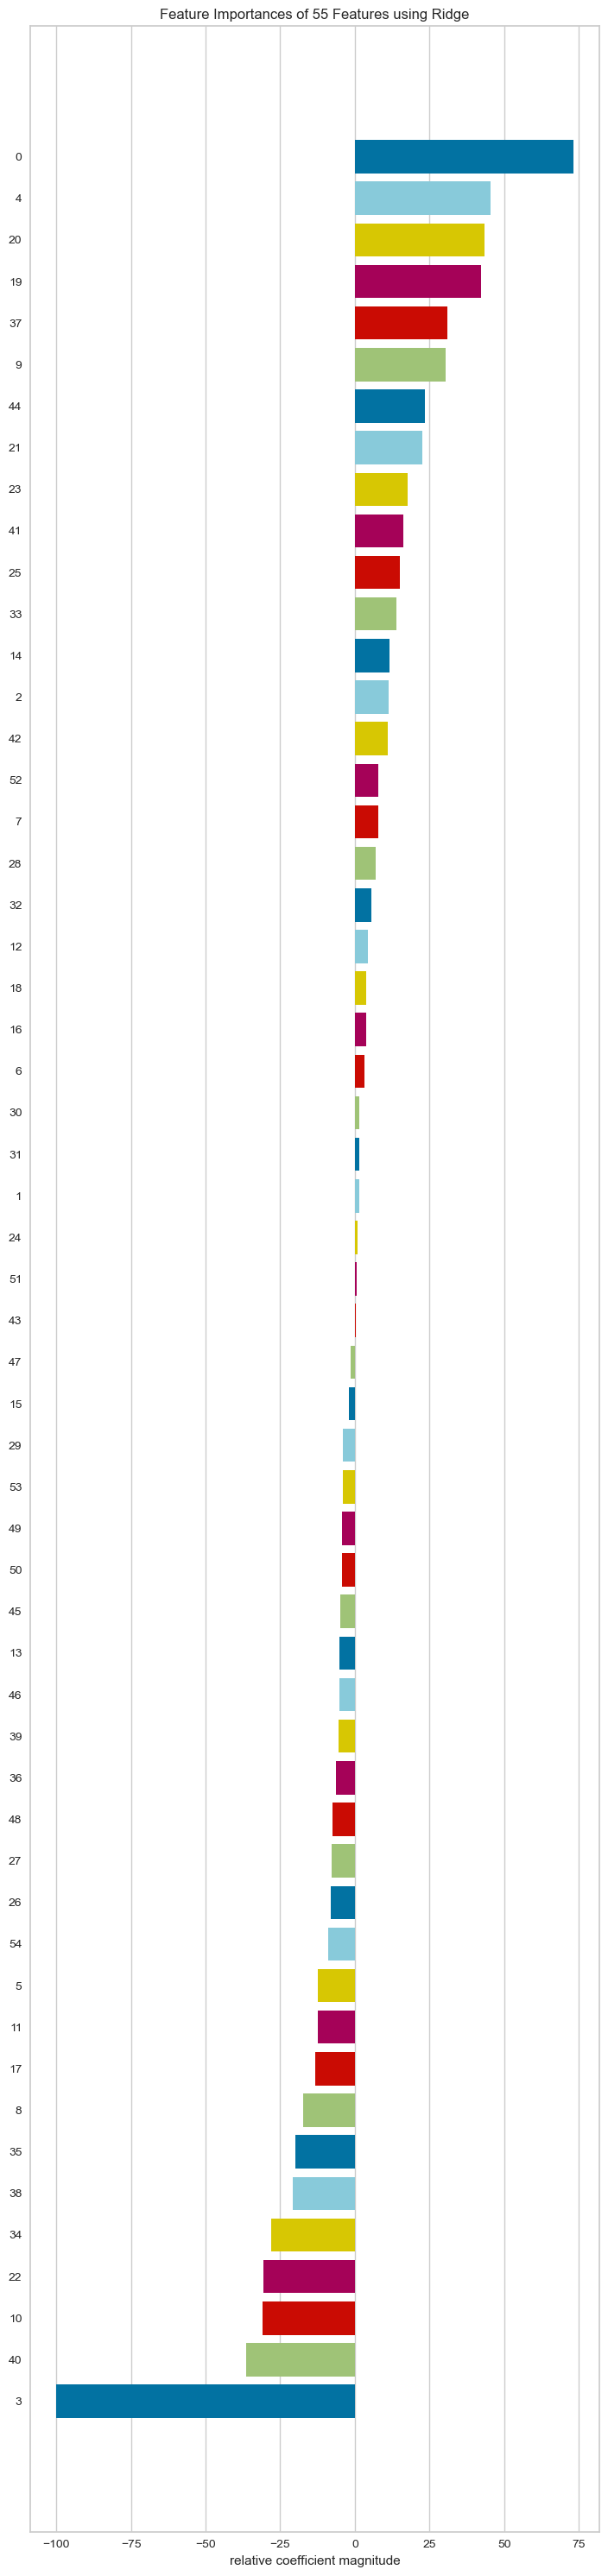

<Axes: title={'center': 'Feature Importances of 55 Features using Ridge'}, xlabel='relative coefficient magnitude'>

In [319]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Ridge(alpha = 0.02)
viz = FeatureImportances(model, labels = pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show()

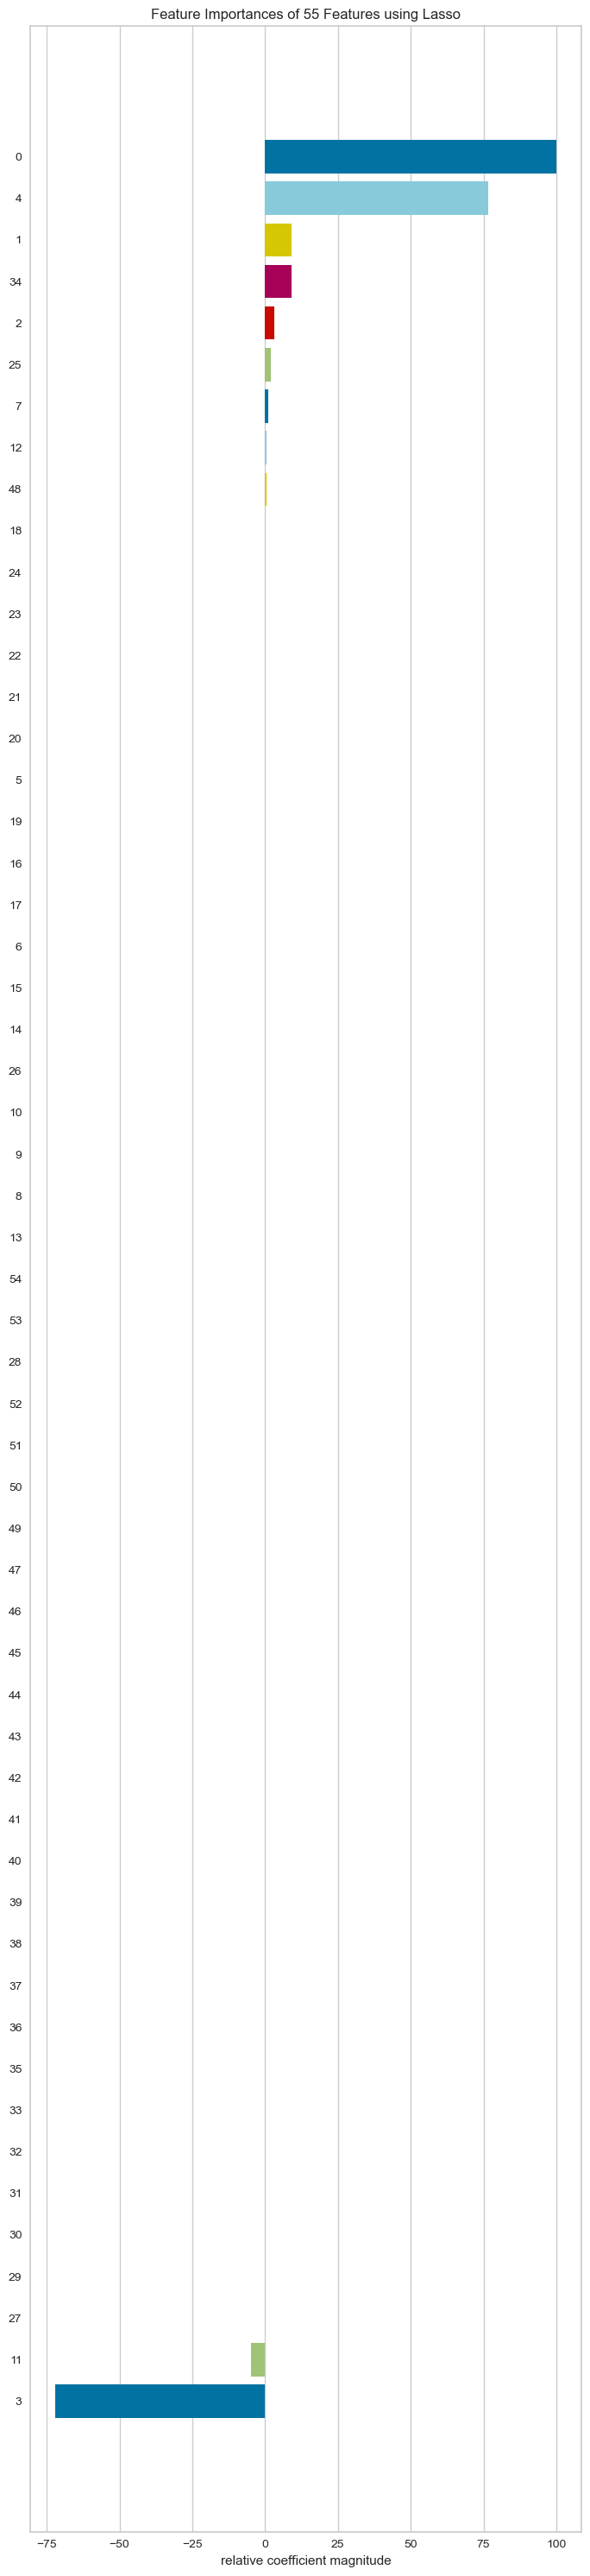

<Axes: title={'center': 'Feature Importances of 55 Features using Lasso'}, xlabel='relative coefficient magnitude'>

In [323]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=0.01)
viz = FeatureImportances(model, labels = pd.DataFrame(X_train).columns)
visualser = RadViz(size=(700, 3000))
viz.fit(X_train_scaled, y_train)
viz.show()

In [324]:
X_new = pd.DataFrame(poly_features)[[0, 3, 4]]

In [325]:
X_new

,0,3,4
0,230.1,52946.01,8697.78
1,44.5,1980.25,1748.85
2,17.2,295.84,789.48
3,151.5,22952.25,6256.95
4,180.8,32688.64,1952.64
...,...,...,...
195,38.2,1459.24,141.34
196,94.2,8873.64,461.58
197,177.0,31329.00,1646.10
198,283.6,80428.96,11911.20


In [326]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [327]:
scaler_new = StandardScaler()

In [328]:
X_train_scaler2 = scaler_new.fit_transform(X_train2)
X_test_scaler2 = scaler_new.transform(X_test2)

In [330]:
lasso_model2 = Lasso(alpha=0.01)
lasso_model2.fit(X_train_scaler2, y_train2)

Lasso(alpha=0.01)

In [331]:
y_pred2 = lasso_model2.predict(X_test_scaler2)
y_train_pred2 = lasso_model2.predict(X_train_scaler2)

In [332]:
train_val(y_train2, y_train_pred2, y_test2, y_pred2, "lasso_new")

,lasso_new_train,lasso_new_test
R2,0.982056,0.987284
mae,0.429271,0.515009
mse,0.465402,0.401370
rmse,0.682204,0.633538


In [333]:
lasso_model2 = Lasso(max_iter=1000000, alpha=0.001)

In [334]:
lasso_model2.fit(X_train_scaled, y_train)

Lasso(alpha=0.001, max_iter=1000000)

In [335]:
y_pred = lasso_model2.predict(X_test_scaled)
y_train_pred = lasso_model2.predict(X_train_scaled)

In [336]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso_001")

,lasso_001_train,lasso_001_test
R2,0.992339,0.991810
mae,0.290686,0.343706
mse,0.198689,0.258493
rmse,0.445746,0.508422


In [337]:
lasso_model2.coef_

array([  7.89061693,   0.33668296,   0.35602312, -12.66643218,
         3.94241649,  -0.72462246,   0.        ,   0.27745939,
        -0.        ,   7.58090336,  -0.01549864,   0.        ,
         0.        ,  -0.41254903,   0.        ,  -0.        ,
         0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,   0.46843998,  -0.4171685 ,   0.        ,
         0.20756791,   0.30918104,  -0.        ,  -0.        ,
         0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  -1.06042396,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        -0.35431863,   0.        ,   0.        ,   0.        ,
         0.51367316,  -0.03312509,  -0.        ,   0.        ,
        -0.        ,  -0.27141665,  -0.        ,   0.        ,
         0.05685782,   0.        ,  -0.14749064])